# Reading data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./../Formations_NLP/articles_bbc_2018_01_30.csv')

In [4]:
data.shape

(309, 2)

In [5]:
data = data.dropna().reset_index(drop=True)

In [6]:
data.shape

(308, 2)

# Cleaning

#### Keeping English articles

In [7]:
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [8]:
data['lang'] = data.articles.progress_map(detect)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [9]:
data.lang.value_counts()

en    257
fa      9
fr      7
id      5
vi      4
hi      4
ar      4
uk      4
ru      4
sw      3
tr      2
es      2
pt      2
de      1
Name: lang, dtype: int64

In [10]:
data = data.loc[data.lang=='en']

#### Tokenization

In [11]:
from nltk.tokenize import sent_tokenize

In [12]:
data['sentences'] = data.articles.progress_map(sent_tokenize)
data['sentences'].head(1).tolist()[0][:3] # Print the first 3 sentences of the 1st article

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


['Image copyright PA/EPA Image caption Oligarch Roman Abramovich (l) and PM Dmitry Medvedev are on the list\r\n\r\nRussian President Vladimir Putin says a list of officials and businessmen close to the Kremlin published by the US has in effect targeted all Russian people.',
 'The list names 210 top Russians as part of a sanctions law aimed at punishing Moscow for meddling in the US election.',
 'However, the US stressed those named were not subject to new sanctions.']

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
data['tokens_sentences'] = data['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(data['tokens_sentences'].head(1).tolist()[0][:3])

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



[['Image', 'copyright', 'PA/EPA', 'Image', 'caption', 'Oligarch', 'Roman', 'Abramovich', '(', 'l', ')', 'and', 'PM', 'Dmitry', 'Medvedev', 'are', 'on', 'the', 'list', 'Russian', 'President', 'Vladimir', 'Putin', 'says', 'a', 'list', 'of', 'officials', 'and', 'businessmen', 'close', 'to', 'the', 'Kremlin', 'published', 'by', 'the', 'US', 'has', 'in', 'effect', 'targeted', 'all', 'Russian', 'people', '.'], ['The', 'list', 'names', '210', 'top', 'Russians', 'as', 'part', 'of', 'a', 'sanctions', 'law', 'aimed', 'at', 'punishing', 'Moscow', 'for', 'meddling', 'in', 'the', 'US', 'election', '.'], ['However', ',', 'the', 'US', 'stressed', 'those', 'named', 'were', 'not', 'subject', 'to', 'new', 'sanctions', '.']]


#### Lemmatizing with POS tagging

In [15]:
from nltk import pos_tag

In [16]:
data['POS_tokens'] = data['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(data['POS_tokens'].head(1).tolist()[0][:3])

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



[[('Image', 'NN'), ('copyright', 'NN'), ('PA/EPA', 'NNP'), ('Image', 'NNP'), ('caption', 'NN'), ('Oligarch', 'NNP'), ('Roman', 'NNP'), ('Abramovich', 'NNP'), ('(', '('), ('l', 'NN'), (')', ')'), ('and', 'CC'), ('PM', 'NNP'), ('Dmitry', 'NNP'), ('Medvedev', 'NNP'), ('are', 'VBP'), ('on', 'IN'), ('the', 'DT'), ('list', 'NN'), ('Russian', 'NNP'), ('President', 'NNP'), ('Vladimir', 'NNP'), ('Putin', 'NNP'), ('says', 'VBZ'), ('a', 'DT'), ('list', 'NN'), ('of', 'IN'), ('officials', 'NNS'), ('and', 'CC'), ('businessmen', 'NNS'), ('close', 'RB'), ('to', 'TO'), ('the', 'DT'), ('Kremlin', 'NNP'), ('published', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('US', 'NNP'), ('has', 'VBZ'), ('in', 'IN'), ('effect', 'NN'), ('targeted', 'VBN'), ('all', 'DT'), ('Russian', 'JJ'), ('people', 'NNS'), ('.', '.')], [('The', 'DT'), ('list', 'NN'), ('names', 'RB'), ('210', 'CD'), ('top', 'JJ'), ('Russians', 'NNPS'), ('as', 'IN'), ('part', 'NN'), ('of', 'IN'), ('a', 'DT'), ('sanctions', 'NNS'), ('law', 'NN'), ('aimed',

In [17]:
# Inspired from https://stackoverflow.com/a/15590384
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [18]:
# Lemmatizing each word with its POS tag, in each sentence
data['tokens_sentences_lemmatized'] = data['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [19]:
data['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

[['Image',
  'copyright',
  'PA/EPA',
  'Image',
  'caption',
  'Oligarch',
  'Roman',
  'Abramovich',
  '(',
  'l',
  ')',
  'and',
  'PM',
  'Dmitry',
  'Medvedev',
  'be',
  'on',
  'the',
  'list',
  'Russian',
  'President',
  'Vladimir',
  'Putin',
  'say',
  'a',
  'list',
  'of',
  'official',
  'and',
  'businessmen',
  'close',
  'to',
  'the',
  'Kremlin',
  'publish',
  'by',
  'the',
  'US',
  'have',
  'in',
  'effect',
  'target',
  'all',
  'Russian',
  'people',
  '.'],
 ['The',
  'list',
  'names',
  '210',
  'top',
  'Russians',
  'as',
  'part',
  'of',
  'a',
  'sanction',
  'law',
  'aim',
  'at',
  'punish',
  'Moscow',
  'for',
  'meddle',
  'in',
  'the',
  'US',
  'election',
  '.'],
 ['However',
  ',',
  'the',
  'US',
  'stress',
  'those',
  'name',
  'be',
  'not',
  'subject',
  'to',
  'new',
  'sanction',
  '.']]

#### Regrouping tokens and removing stop words

In [20]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

In [21]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [22]:
data['tokens'] = data['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
data['tokens'] = data['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

In [23]:
data['tokens'].head(1).tolist()[0][:30]

['oligarch',
 'roman',
 'abramovich',
 'pm',
 'dmitry',
 'medvedev',
 'list',
 'russian',
 'president',
 'vladimir',
 'putin',
 'list',
 'official',
 'businessmen',
 'close',
 'kremlin',
 'publish',
 'us',
 'effect',
 'target',
 'russian',
 'people',
 'list',
 'names',
 'top',
 'russians',
 'part',
 'sanction',
 'law',
 'aim']

# LDA

## Data preparation

#### Prepare bi-grams and tri-grams

In [24]:
from gensim.models import Phrases

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [25]:
tokens = data['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:316: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


#### Prepare objects for LDA gensim implementation

In [26]:
from gensim import corpora

In [27]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

## Running LDA

In [28]:
from gensim import models
import numpy as np

In [29]:
np.random.seed(123456)
num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

Wall time: 7.75 s


## Quick exploration of LDA results

#### Looking at topics

In [271]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.024*"base" + 0.018*"data" + 0.015*"security" + 0.015*"show" + 0.015*"plan" + 0.011*"part" + 0.010*"activity" + 0.010*"road" + 0.008*"afghanistan" + 0.008*"track" + 0.007*"former" + 0.007*"add" + 0.007*"around_world" + 0.007*"university" + 0.007*"building" + 0.006*"mobile_phone" + 0.006*"point" + 0.006*"new" + 0.006*"exercise" + 0.006*"open"

1: 0.014*"woman" + 0.010*"child" + 0.010*"tunnel" + 0.007*"law" + 0.007*"customer" + 0.007*"continue" + 0.006*"india" + 0.006*"hospital" + 0.006*"live" + 0.006*"public" + 0.006*"video" + 0.005*"couple" + 0.005*"place" + 0.005*"people" + 0.005*"another" + 0.005*"case" + 0.005*"government" + 0.005*"health" + 0.005*"part" + 0.005*"underground"

2: 0.011*"government" + 0.008*"become" + 0.008*"call" + 0.007*"report" + 0.007*"northern_mali" + 0.007*"group" + 0.007*"ansar_dine" + 0.007*"tuareg" + 0.007*"could" + 0.007*"us" + 0.006*"journalist" + 0.006*"really" + 0.006*"story" + 0.006*"post" + 0.006*"islamist" + 0.005*"data" + 0.005*"news" + 0.005*"ne

#### Allocating topics to documents

In [171]:
print(data.articles.loc[0][:500])

Image copyright PA/EPA Image caption Oligarch Roman Abramovich (l) and PM Dmitry Medvedev are on the list

Russian President Vladimir Putin says a list of officials and businessmen close to the Kremlin published by the US has in effect targeted all Russian people.

The list names 210 top Russians as part of a sanctions law aimed at punishing Moscow for meddling in the US election.

However, the US stressed those named were not subject to new sanctions.

Mr Putin said the list was an unfr


In [172]:
lda_model[corpus[0]]

[(14, 0.9983065953654187)]

#### Predicting topics on unseen documents

In [44]:
document = '''Eric Tucker, a 35-year-old co-founder of a marketing company in Austin, Tex., had just about 40 Twitter followers. But his recent tweet about paid protesters being bused to demonstrations against President-elect Donald J. Trump fueled a nationwide conspiracy theory — one that Mr. Trump joined in promoting. 

Mr. Tucker's post was shared at least 16,000 times on Twitter and more than 350,000 times on Facebook. The problem is that Mr. Tucker got it wrong. There were no such buses packed with paid protesters.

But that didn't matter.

While some fake news is produced purposefully by teenagers in the Balkans or entrepreneurs in the United States seeking to make money from advertising, false information can also arise from misinformed social media posts by regular people that are seized on and spread through a hyperpartisan blogosphere.

Here, The New York Times deconstructs how Mr. Tucker’s now-deleted declaration on Twitter the night after the election turned into a fake-news phenomenon. It is an example of how, in an ever-connected world where speed often takes precedence over truth, an observation by a private citizen can quickly become a talking point, even as it is being proved false.'''
tokens = word_tokenize(document)
topics = lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in lda_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

,topic #,weight,words in topic
0,2,0.17,"0.011*""government"" + 0.008*""become"" + 0.008*""c..."
1,3,0.23,"0.011*""people"" + 0.008*""work"" + 0.008*""benefit..."
2,10,0.41,"0.008*""people"" + 0.007*""president"" + 0.006*""co..."
3,11,0.19,"0.010*""game"" + 0.009*""design"" + 0.009*""wave"" +..."


## Advanced exploration of LDA results

#### Allocation of topics in all documents

In [46]:
topics = [lda_model[corpus[i]] for i in range(len(data))]

In [47]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0385366,NaN,NaN,NaN,NaN,NaN,0.0913012,NaN,NaN,0.869287,NaN


In [48]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [49]:
document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.998307,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.976829,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.125918,0.872972,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.973611,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.038536,0.0,0.0,0.0,0.0,0.000000,0.091307,0.000000,0.0,0.869281,0.0


In [50]:
# Which document are about topic 14
document_topic.sort_values(14, ascending=False)[14].head(20)

0      0.998307
91     0.997716
81     0.994099
219    0.994099
228    0.993493
218    0.991441
179    0.990594
203    0.985606
232    0.979348
49     0.963462
104    0.841667
74     0.841667
168    0.731684
7      0.709538
195    0.669397
34     0.433761
237    0.332383
21     0.232274
25     0.171890
235    0.139897
Name: 14, dtype: float64

In [51]:
print(data.articles.loc[91][:1000])

Image caption Brendan Cole was a professional dancer on Strictly Come Dancing for 13 years

Brendan Cole has announced he will not be returning to Strictly Come Dancing.

The professional dancer revealed during a TV interview on Tuesday that the decision was made by the BBC, saying he was "in shock".

"They made an editorial decision not to have me back on the show," he said on ITV's Lorraine.

A spokesman for the BBC One show thanked Cole for "being part of the show since the beginning" and contributing to its success.

'Emotional and raw'

Cole said: "I'm a little bit in shock at the moment.

"I'm quite emotional and a bit raw about it. I am very disappointed. It's an editorial decision. I will never know the ins and outs.

"I have had 15 incredible series on the show, I'm very proud of the whole show, they're a great team."

Media playback is unsupported on your device Media caption In an interview on 16 January, Brendan Cole told 5 live he wanted to return to Stri


#### Looking at the distribution of topics in all documents

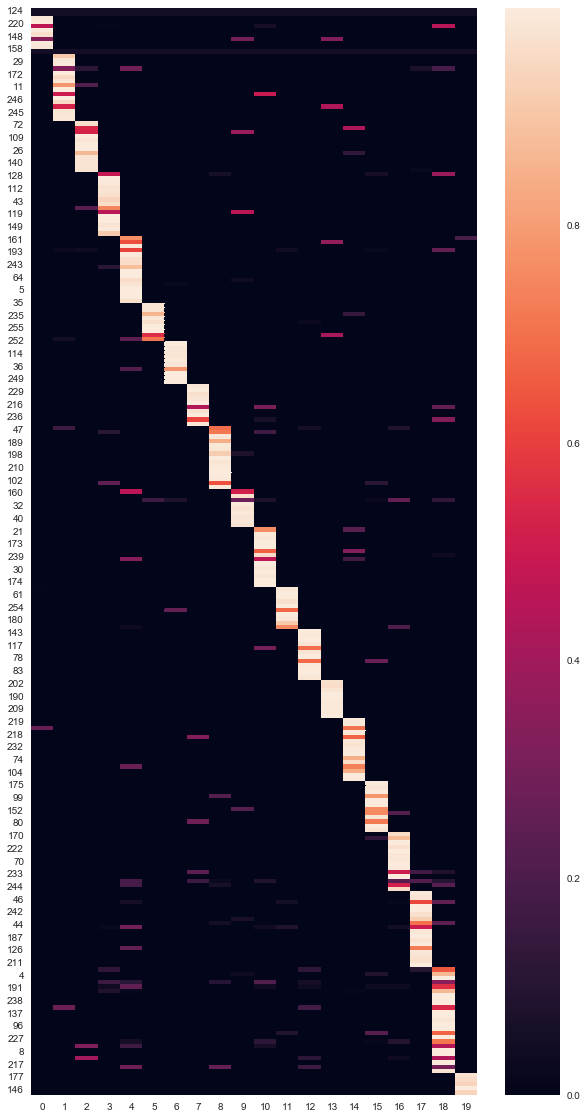

In [58]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

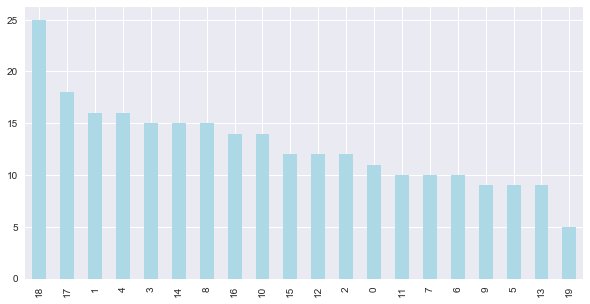

In [71]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

#### Visualizing topics

In [269]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)